In [1]:
#Import the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('vgsales.csv')

In [3]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
# Determine the Types of data you are working with
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
# Determine if there are any null items in the dataframe
df.isnull().sum(axis = 0)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df['Platform'].describe()

count     16598
unique       31
top          DS
freq       2163
Name: Platform, dtype: object

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
# Remove the Year (not required for the current analysis)
#dfa = df.drop(['Year'],axis=1)
#dfa.isnull().sum(axis = 0)

In [9]:
count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]  # gives number of col count

print('Number of Row = {}'.format(count_row))
print('Number of Columns = {}'.format(count_col))

Number of Row = 16598
Number of Columns = 11


In [10]:
# Unique Platforms
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
# Unique Platforms Counts
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [12]:
# View a sample of the dataframe
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Questions

- Which platform sales the best in each region
- Which publisher is offering more platforms
- What category affects sales the most

In [13]:
# Question: Which Publisher has more platforms

df0 = df.groupby(['Publisher']).agg({'Platform':pd.Series.nunique}) 
df0.sort_values(by='Platform', ascending=False, inplace=True)
df0.head(5)

,Platform
Publisher,
Namco Bandai Games,23
Konami Digital Entertainment,23
Capcom,23
Sega,21
Activision,20


In [14]:
#df_na = df
#df0 = df.groupby(['Platform']).agg({'Platform':pd.Series.nunique}) 
#df_na.sort_values(by='NA_Sales', ascending=False, inplace=True)
#df_na.head(5)

In [15]:
# Question: Which platform sales the best in each region

df_na= df.groupby(['Platform']).agg({'NA_Sales':np.sum})
df_na.sort_values(by='NA_Sales', ascending=False, inplace=True)
df_na.reset_index(inplace=True)
df_na.head(1)

,Platform,NA_Sales
0,X360,601.05


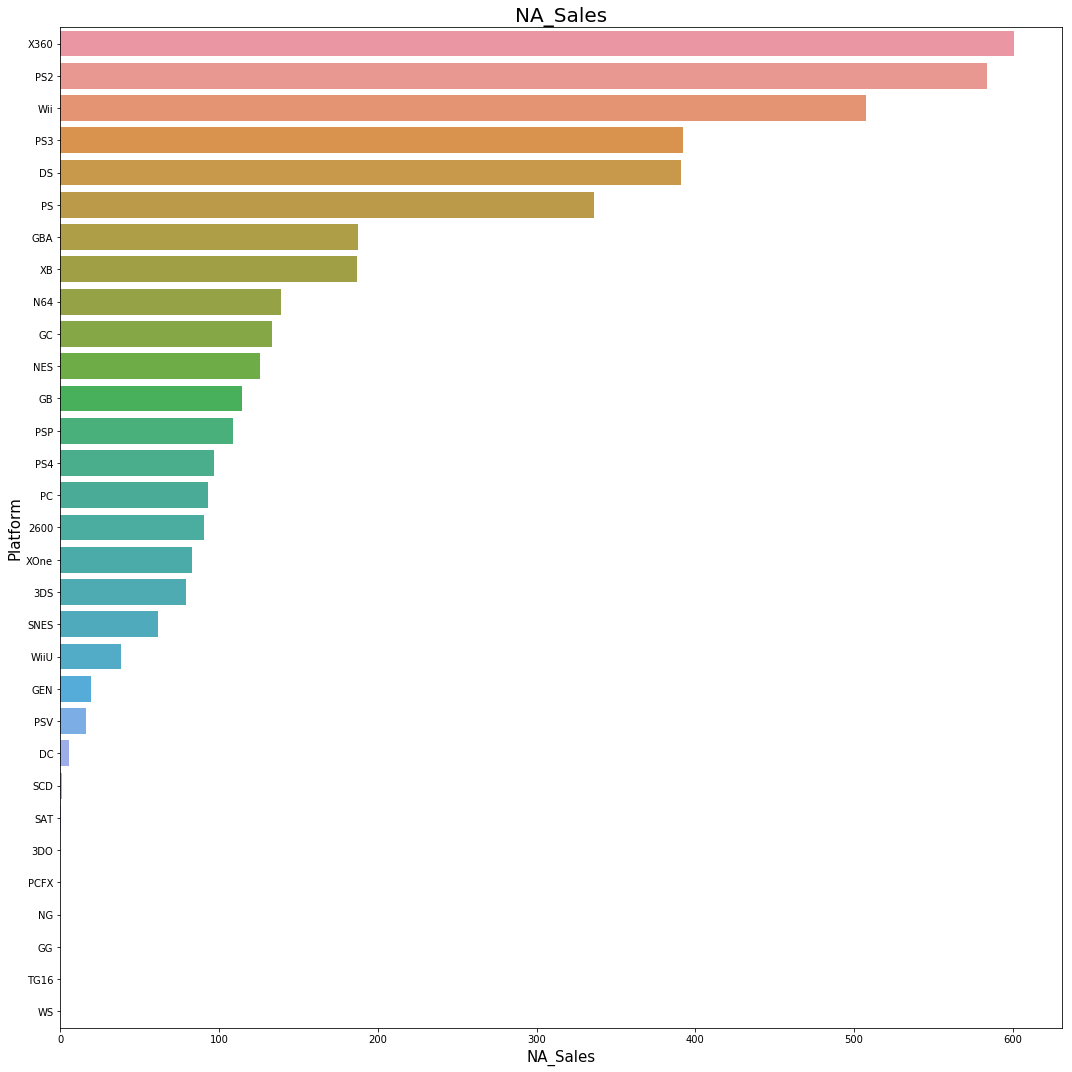

In [16]:
plt.figure(figsize=(15, 15))
plt.title('NA_Sales', size = 20, color='black')

ax = sns.barplot(df_na['NA_Sales'], df_na['Platform'])

plt.ylabel('Platform', size =15, color='black')
plt.xlabel('NA_Sales', size =15, color='black')

plt.tight_layout()

In [17]:
# Question: Which platform sales the best in each region

df_sales= df.groupby(['Platform']).agg({'NA_Sales':np.sum,'JP_Sales':np.sum,'EU_Sales':np.sum,'Other_Sales':np.sum,'Global_Sales':np.sum})
df_sales.sort_values(by='Global_Sales', ascending=False, inplace=True)
df_sales.head(5)

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,139.20,339.29,193.44,1255.64
X360,601.05,12.43,280.58,85.54,979.96
PS3,392.26,79.99,343.71,141.93,957.84
Wii,507.71,69.35,268.38,80.61,926.71
DS,390.71,175.57,194.65,60.53,822.49


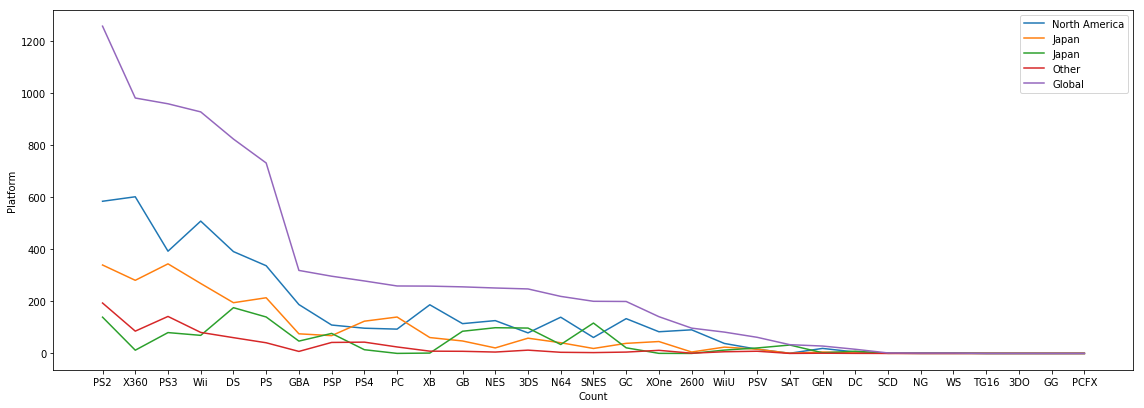

In [18]:
#

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(df_sales['NA_Sales'], label='North America')
ax.plot(df_sales['EU_Sales'], label='Japan')
ax.plot(df_sales['JP_Sales'], label='Japan')
ax.plot(df_sales['Other_Sales'], label='Other')
ax.plot(df_sales['Global_Sales'], label='Global')

ax.legend()
ax.set_xlabel('Count')
ax.set_ylabel('Platform');

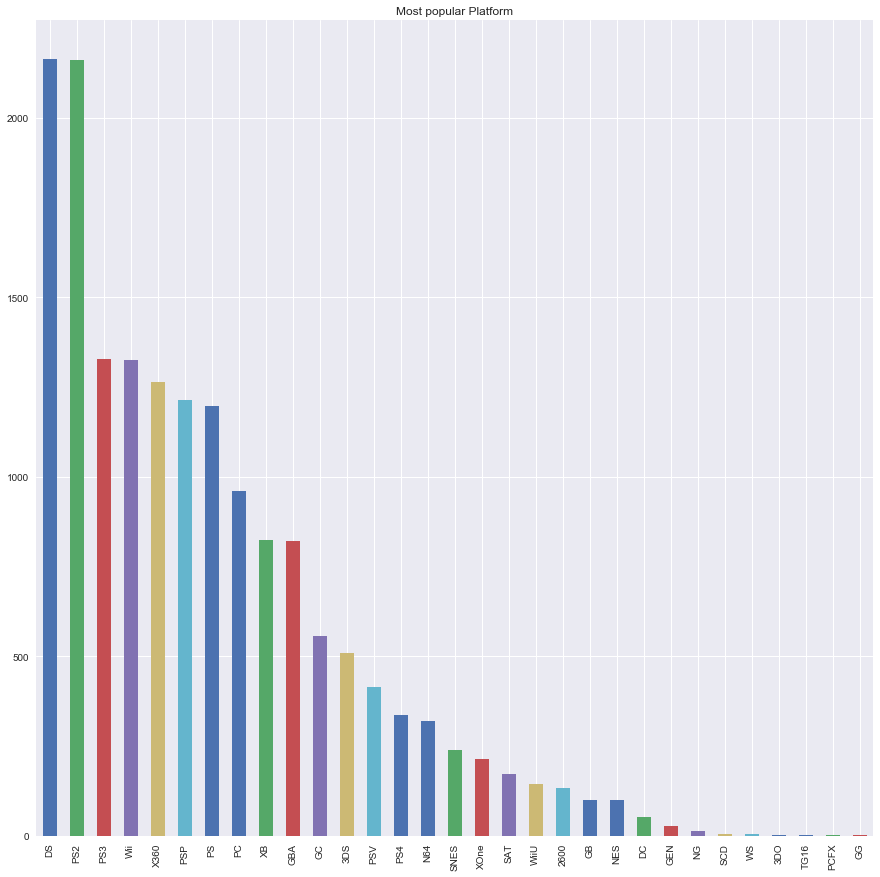

In [26]:
# Most popular Platform

df_popular = df.Platform.value_counts()
df_popular.plot(kind="bar");
plt.title("Most popular Platform")
plt.rcParams["figure.figsize"] = (10,5);

In [20]:
df.shape

(16598, 11)

In [21]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
df['Name_encoded'] = LabelEncoder().fit_transform(df['Name'])
df['Platform_encoded'] = LabelEncoder().fit_transform(df['Platform'])
df['Genre_encoded'] = LabelEncoder().fit_transform(df['Genre'])
df['Publisher_encoded'] = LabelEncoder().fit_transform(df['Year'])

df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_encoded,Platform_encoded,Genre_encoded,Publisher_encoded
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,11007,26,10,26
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,9327,11,4,5
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,5573,26,6,28
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,11009,26,10,29
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7346,5,7,16


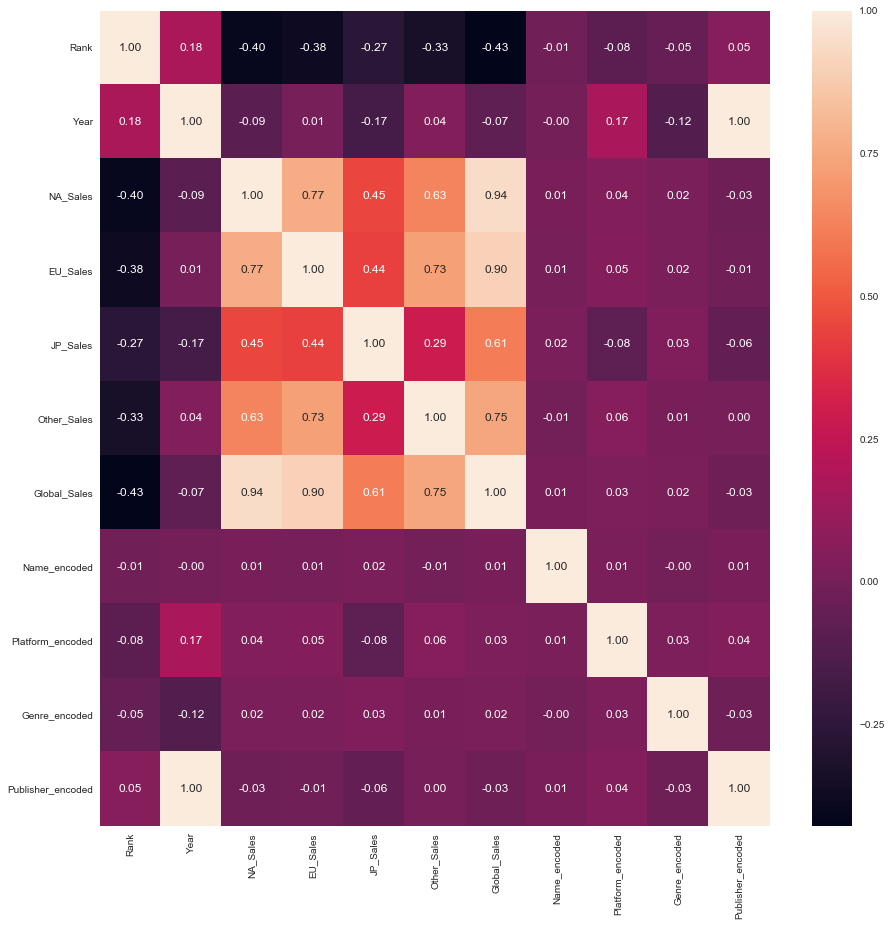

In [23]:
# Look for corelation to predict

sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [24]:
# Here we can see that none of our variables appear to greatly correlated with salary
# and we can see that if someone was given an expected salary question, they either
# never answered the salary question or they were not given the salary question

X = df[['Name_encoded','Platform_encoded','Genre_encoded','Publisher_encoded']]
y = df['NA_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)

In [25]:
print('R2 SCore', r2_score(y_test, y_test_preds))
print('Mean Squared', mean_squared_error(y_test, y_test_preds))

R2 SCore 0.0027808297691702677
Mean Squared 0.8240440524284138
